In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.rcParams["figure.figsize"] = (20, 10)

In [2]:
import time
import sys
class ProcessBar():
    def reset(self, length):
        self._length = length
        self._start = time.time()
    def show(self, i, msg=""):
        percents = i / self._length
        equal_length = int(50 * percents) * "="
        empty_length = (49 - int(50 * percents)) * " "
        line_str = "[{}>{}] {}/{} {:.1f}% {:.2f}s {}".format(equal_length, empty_length, i,
                                                        self._length, 100 * percents, time.time() - self._start, msg)
        sys.stdout.write("\r" + line_str)
    def summary(self, i, msg=""):
        line_str = "[{}] {} {} {:.2f}s {}".format(50 * "=", i, self._length, time.time() - self._start, msg)
        sys.stdout.write("\r{}\n".format(line_str))
pb = ProcessBar()

In [3]:
pb.reset(50)
for i in range(50):
    pb.show(i)
    time.sleep(0.1)

[=================================================>] 49/50 98.0% 4.92s 

In [4]:
file_path = "example.jpg"

In [5]:
img = cv2.imread(file_path)

In [6]:
def params_weights(params, weights = None):
    if weights is None:
        return params[np.random.randint(len(params) - 1)]
    rand = np.random.rand() * np.sum(weights)
    sumnum = 0
    for i, val in enumerate(weights):
        sumnum += val
        if sumnum > rand:
            return params[i]
    return params[i]

In [7]:
def adjust_gamma(image, gamma=0.8):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

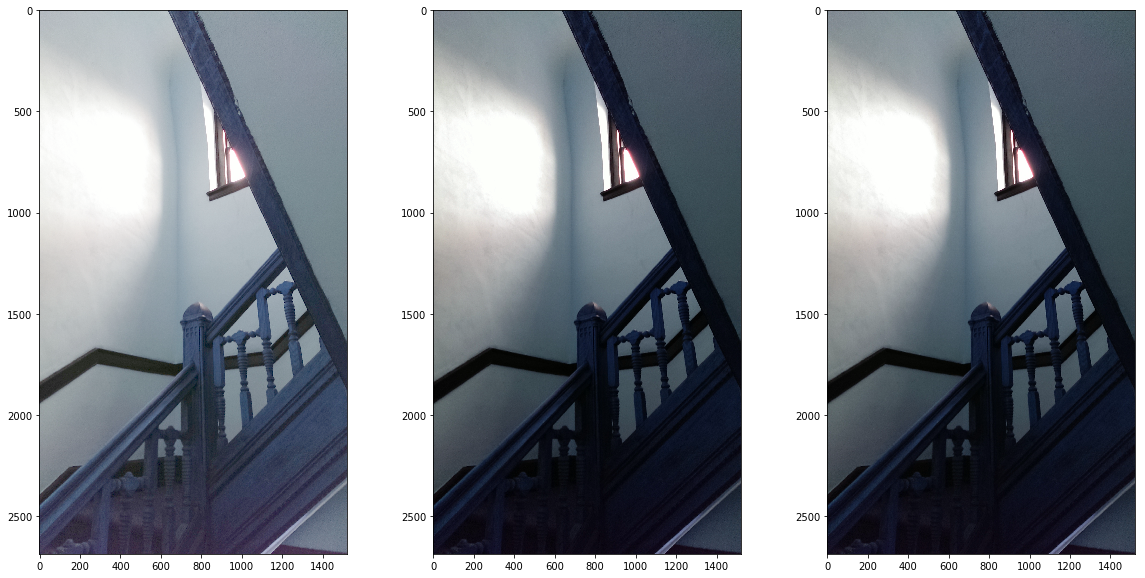

In [8]:
plt.subplot(1, 3, 1)
gamma_img = adjust_gamma(img, gamma=2)
plt.imshow(gamma_img)
plt.subplot(1, 3, 2)
plt.imshow(adjust_gamma(gamma_img, 0.5))
plt.subplot(1, 3, 3)
plt.imshow(img)

In [9]:
def rotate_image(image, rotate=1):
    return np.rot90(image, rotate)

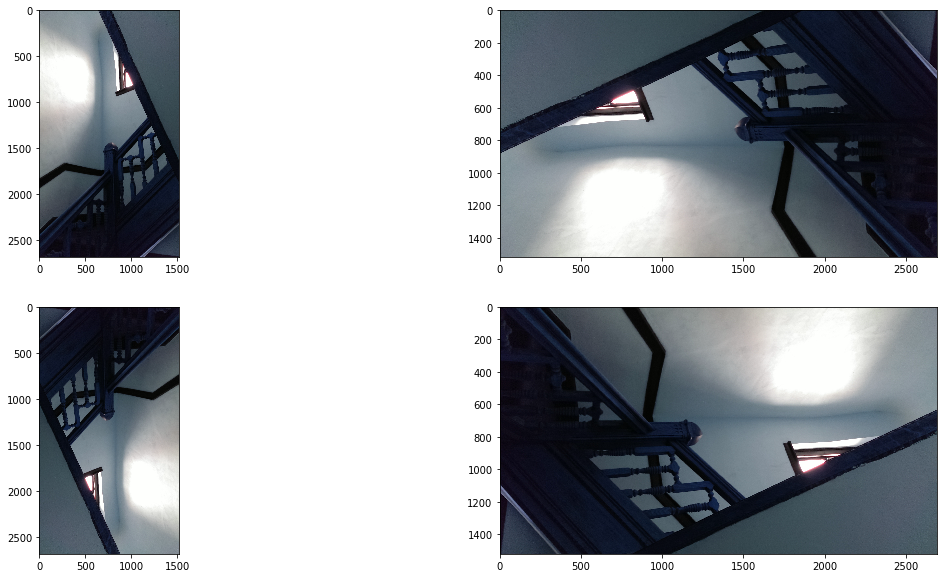

In [10]:
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.subplot(2, 2, 2)
plt.imshow(rotate_image(img, 1))
plt.subplot(2, 2, 3)
plt.imshow(rotate_image(img, 2))
plt.subplot(2, 2, 4)
plt.imshow(rotate_image(img, 3))

In [11]:
'''
    flip_mode:
        0: horizontal
        1: vertical
        2: horizontal and vertical
'''

def flip_image(image, flip_mode=0):
    if flip_mode == 0 or flip_mode == 2:
        image = np.flip(image, axis=1)
    if flip_mode == 1 or flip_mode == 2:
        image = np.flip(image, axis=0)
    return image

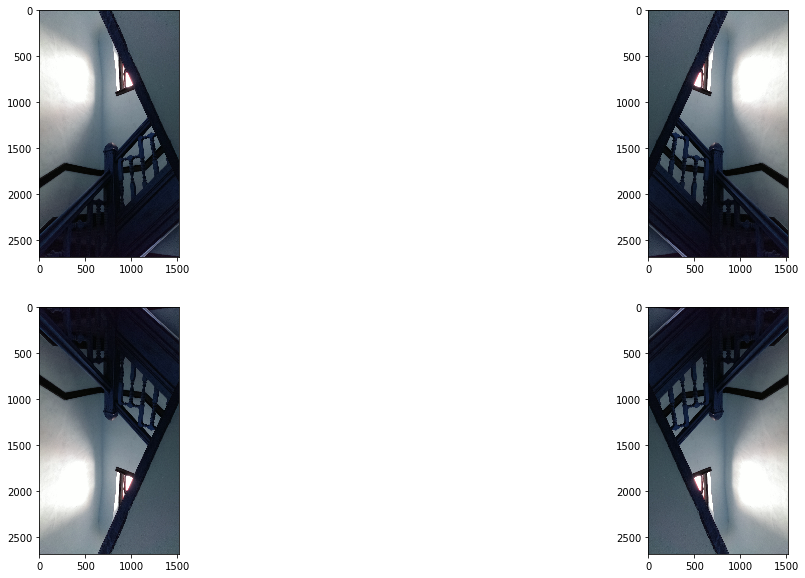

In [12]:
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.subplot(2, 2, 2)
plt.imshow(flip_image(img, 0))
plt.subplot(2, 2, 3)
plt.imshow(flip_image(img, 1))
plt.subplot(2, 2, 4)
plt.imshow(flip_image(img, 2))

In [13]:
def add_salt_pepper_noise(X_img):
    # Need to produce a copy as to not modify the original image
    X_img_copy = X_img.copy()
    row, col, _ = X_img_copy.shape
    salt_vs_pepper = 0.2
    amount = 0.004
    num_salt = np.ceil(amount * X_img_copy.size * salt_vs_pepper)
    num_pepper = np.ceil(amount * X_img_copy.size * (1.0 - salt_vs_pepper))
    # Add Salt noise
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in X_img_copy.shape]
    X_img_copy[coords[0], coords[1], coords[2]] = 1

    # Add Pepper noise
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in X_img_copy.shape]
    X_img_copy[coords[0], coords[1], coords[2]] = 0
    return X_img_copy

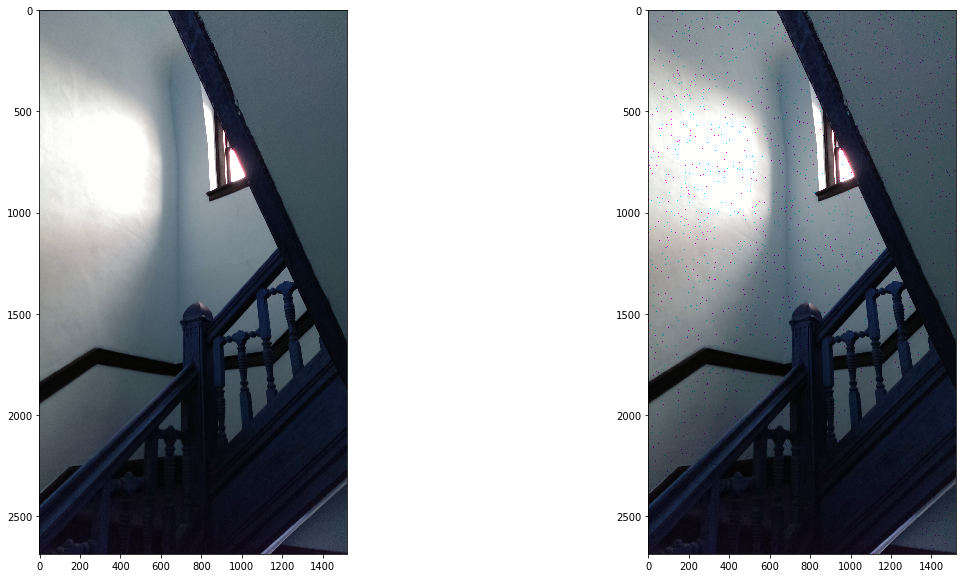

In [14]:
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(add_salt_pepper_noise(img))

In [15]:
def add_gaussian_noise(X_img, mean = 0, var=0.1, all_channel = False):
    gaussian_noise_imgs = []
    row, col, channel = X_img.shape
    # Gaussian distribution parameters

    sigma = var ** 0.5
    if all_channel is False:
        gaussian = np.random.normal(mean, sigma, (row, col, 1)).astype(np.float32)
        gaussian = np.clip(gaussian, 0, 1)
        gaussian = np.concatenate((gaussian, gaussian, gaussian), axis = 2)
    else:
        gaussian = np.random.normal(mean, sigma, (row, col, channel)).astype(np.float32)
        gaussian = np.clip(gaussian, 0, 1)

    gaussian_img = cv2.addWeighted(X_img.astype(np.float32) / 255.0, 0.75, 0.25 * gaussian, 0.25, 0)

    return np.asarray(gaussian_img * 255.0, dtype=np.uint8)

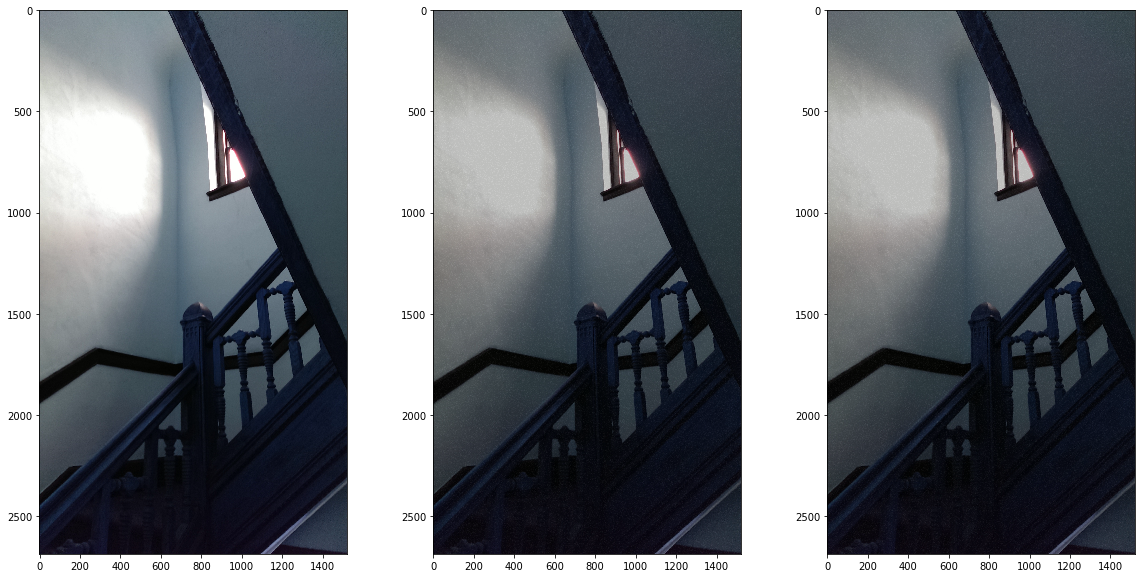

In [16]:
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
light_img = add_gaussian_noise(img)
plt.imshow(light_img)
plt.subplot(1, 3, 3)
light_img = add_gaussian_noise(img)
plt.imshow(light_img)

In [17]:
def brightness_augment(image):
    image = np.copy(image).astype(np.float32)
    image1 = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    random_bright = .25 + np.random.uniform()
    #print(random_bright)
    image1[:, :, 2] = image1[:, :, 2] * random_bright
    image1 = np.clip(image1, 0, 255)
    image1 = cv2.cvtColor(image1, cv2.COLOR_HSV2RGB)
    return image1.astype(np.uint8)

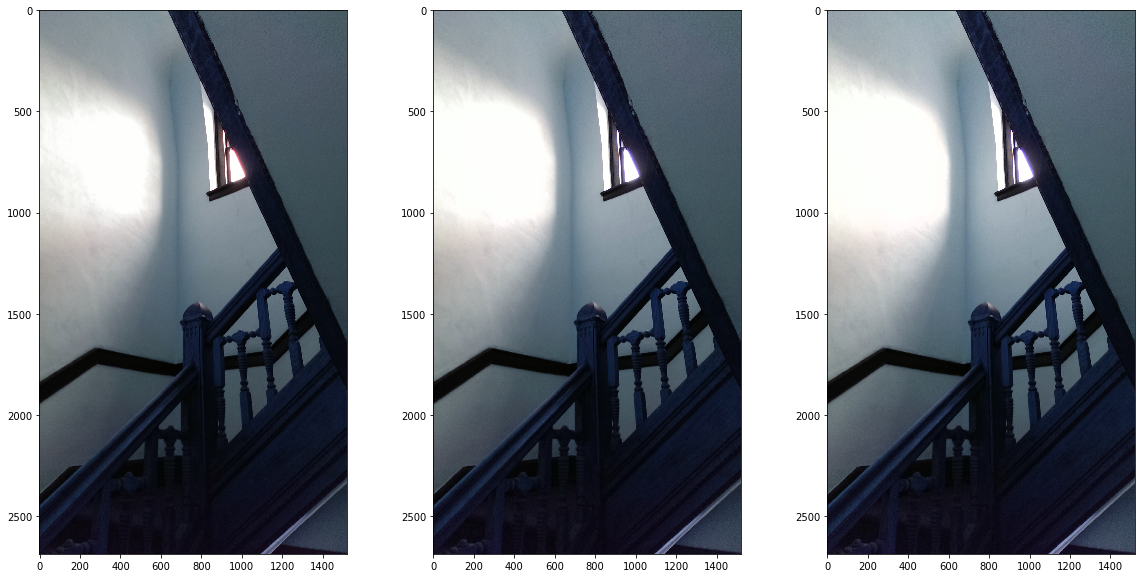

In [20]:
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
light_img = brightness_augment(img)
plt.imshow(light_img)
plt.subplot(1, 3, 3)
light_img = brightness_augment(img)
plt.imshow(light_img)

In [22]:
def random_crop(img, target=(512, 512)):
    row, col, _ = img.shape
    random_offset_X = np.random.randint(row - target[0])
    random_offset_Y = np.random.randint(col - target[1])
    return img[random_offset_X: random_offset_X + target[0],
               random_offset_Y: random_offset_Y + target[1]]

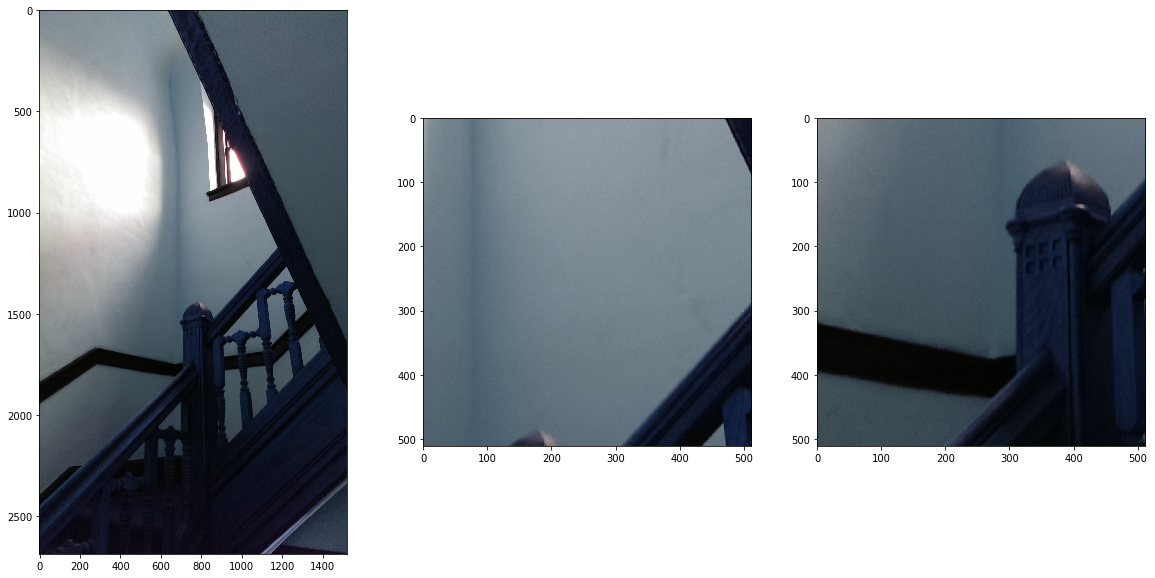

In [23]:
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(random_crop(img))
plt.subplot(1, 3, 3)
plt.imshow(random_crop(img))

In [27]:
def change_contract_brightness(image, alpha=1, beta=0):
    image = image.astype(np.float32)
    return np.clip(alpha * image + beta, 0, 255).astype(np.uint8)

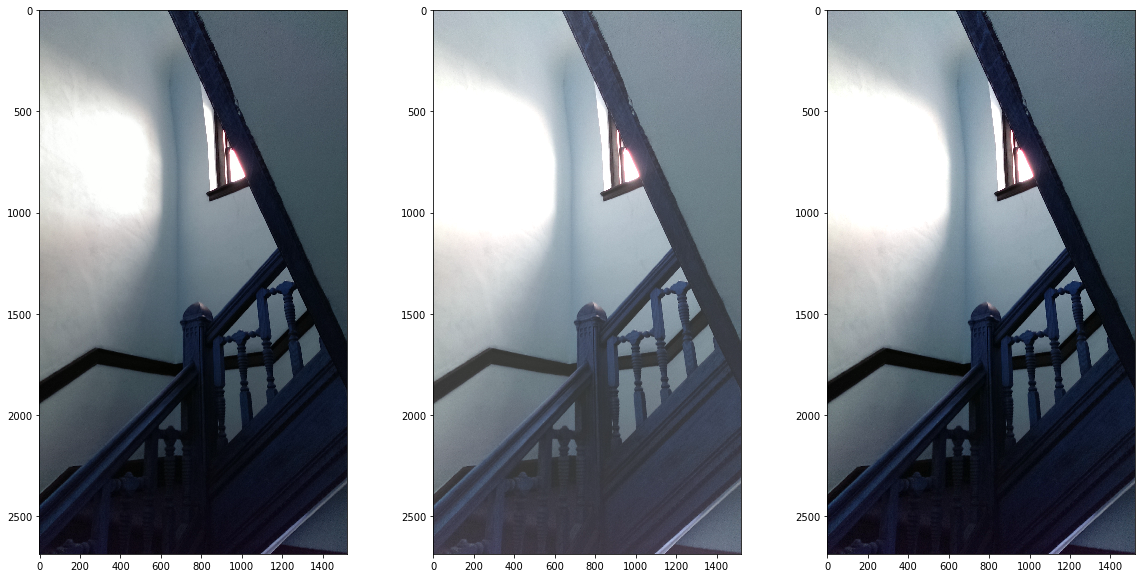

In [28]:
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(change_contract_brightness(img, alpha=1.0, beta=50))
plt.subplot(1, 3, 3)
plt.imshow(change_contract_brightness(img, alpha=1.2, beta=0))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcde838b0f0>]],
      dtype=object)

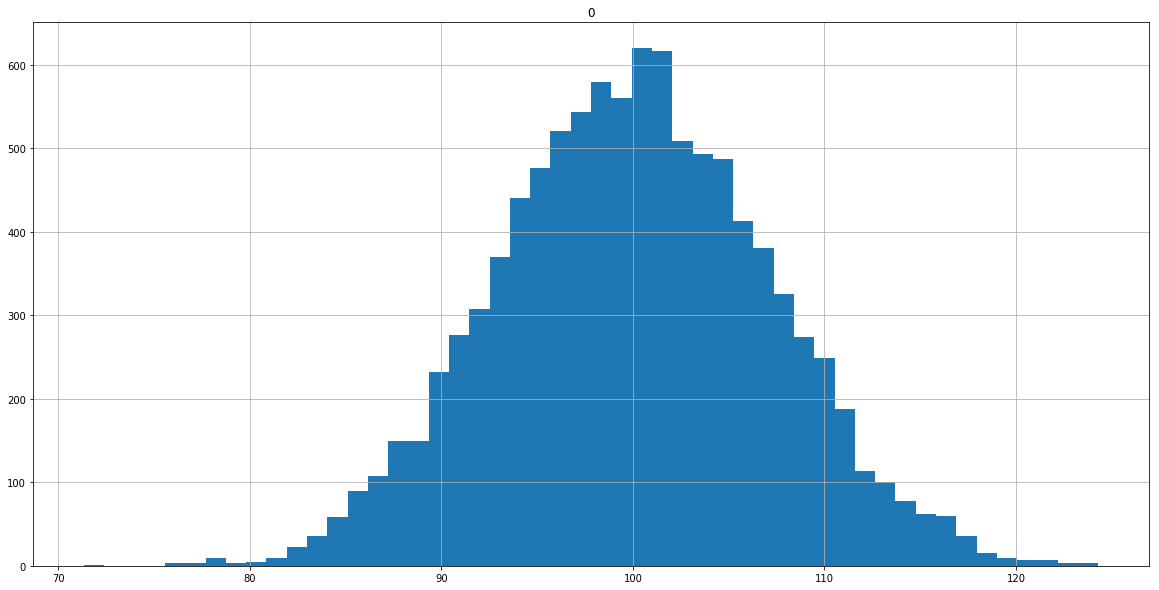

In [29]:
def gauss_random(mean = 1.0, var = 1):
    sigma = var ** 0.5
    return np.random.normal(mean, sigma)

res = []
for i in range(10000):
    res.append(gauss_random(100, 50))
pd.DataFrame(res).hist(bins=50)

In [30]:
def resize_image(image, factor=0.8):
    return cv2.resize(image, None, fx=factor, fy=factor, interpolation=cv2.INTER_CUBIC)

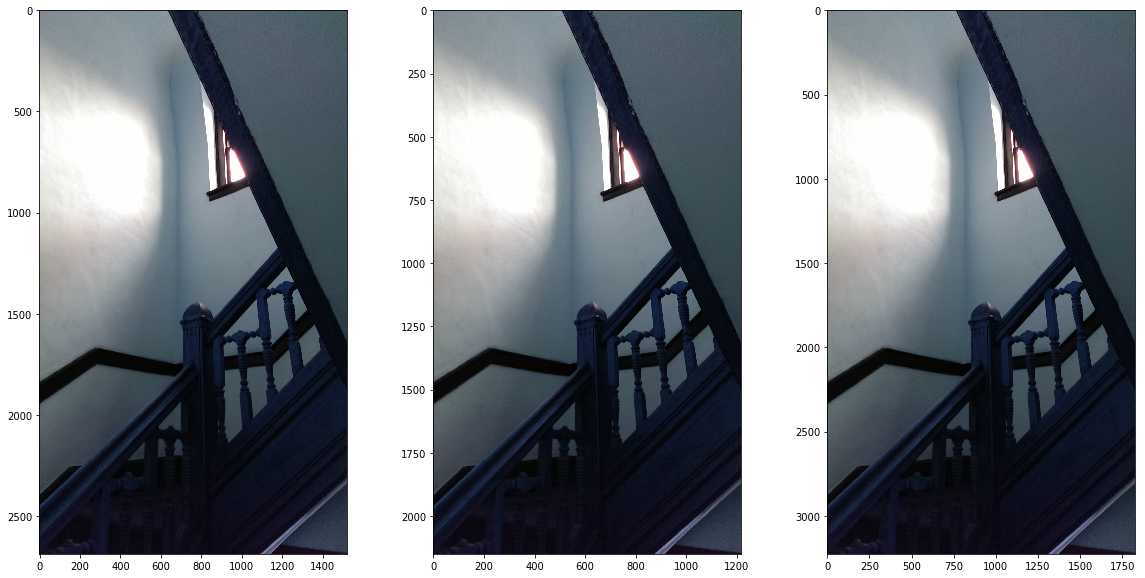

In [31]:
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(resize_image(img, 0.8))
plt.subplot(1, 3, 3)
plt.imshow(resize_image(img, 1.2))

In [32]:
img = img.astype(np.float32)
img -= np.mean(img, axis=(0, 1))
img /= np.std(img, axis=(0, 1))

In [33]:
np.mean(img)

0.011914097

In [34]:
np.std(img)

1.0032908